In [1]:
from numpy.random import seed
seed(101)
from tensorflow import set_random_seed
set_random_seed(101)

import os
import pandas as pd
import numpy as np
from glob import glob

import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import Sequential

from keras import layers
from keras import Model


from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.callbacks import ModelCheckpoint
from keras.utils import Sequence
from keras import optimizers
from keras import backend as K

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau



from sklearn.metrics import classification_report
from keras.optimizers import SGD


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline


from keras.applications.xception import Xception

C:\Users\peravit2\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\peravit2\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\peravit2\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\peravit2\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
train_path = 'train/'
valid_path = 'test/'

# train_path = 'sources/train'
# valid_path = 'sources/test'

# num_train_samples = 8015 # len(df_train)
# num_val_samples = 2000    # len(df_val)


num_train_samples = 1000 # len(df_train)
num_val_samples = 216   # len(df_val)
train_batch_size = 10
val_batch_size = 10

image_size = 224
# image_size = 300

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)




train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (image_size,image_size),
                                                 batch_size = train_batch_size)


test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (image_size,image_size),
                                            batch_size = val_batch_size)

Found 326 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [3]:
pre_trained_model = Xception(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

In [4]:
last_layer = pre_trained_model.get_layer('block14_sepconv2_act')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output


x = layers.GlobalMaxPooling2D()(last_output)

x = layers.Dense(512, activation='relu')(x)

x = layers.BatchNormalization(axis=-1)(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(2, activation='softmax')(x)


model = Model(pre_trained_model.input, x)
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

last layer output shape: (None, 7, 7, 2048)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

__________________________________________________________________________________________________
block11_sepconv3_bn (BatchNorma (None, 14, 14, 728)  2912        block11_sepconv3[0][0]           
__________________________________________________________________________________________________
add_10 (Add)                    (None, 14, 14, 728)  0           block11_sepconv3_bn[0][0]        
                                                                 add_9[0][0]                      
__________________________________________________________________________________________________
block12_sepconv1_act (Activatio (None, 14, 14, 728)  0           add_10[0][0]                     
__________________________________________________________________________________________________
block12_sepconv1 (SeparableConv (None, 14, 14, 728)  536536      block12_sepconv1_act[0][0]       
__________________________________________________________________________________________________
block12_se

In [6]:
len(model.layers)

137

In [7]:
print(test_set.class_indices)

{'test_mama': 0, 'test_nonmama': 1}


In [8]:
class_weights={
    0: 1.0, # mama
    1: 1.0 # nonmama
}

In [9]:
history = model.fit_generator(training_set,
                    steps_per_epoch = 100,
                    epochs = 5,
                    validation_data = test_set,
                    validation_steps = val_steps)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
 49/100 [=============>................] - ETA: 1:17 - loss: 0.7557 - acc: 0.7014

KeyboardInterrupt: 

In [11]:
model.save('model_Xception-2.h5')

In [12]:
test_batches = test_datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=1,
                                            shuffle=False)


predictions = model.predict_generator(test_batches, steps=num_val_samples, verbose=1)


Found 216 images belonging to 2 classes.
216/216 [==============================] - 22s 101ms/step


In [13]:
y_pred = np.argmax(predictions, axis=-1)
len(y_pred)

216

In [14]:
sum(y_pred==test_batches.classes)

215

In [15]:
len(test_batches.classes)

216

In [16]:
sum(y_pred==test_batches.classes)/len(y_pred)

0.9953703703703703

In [17]:
test_labels = test_batches.classes

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

cm

array([[ 57,   1],
       [  0, 158]], dtype=int64)

In [18]:
target_names = ['mama','nonmama']
print(classification_report(test_batches.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        mama       1.00      0.98      0.99        58
     nonmama       0.99      1.00      1.00       158

   micro avg       1.00      1.00      1.00       216
   macro avg       1.00      0.99      0.99       216
weighted avg       1.00      1.00      1.00       216



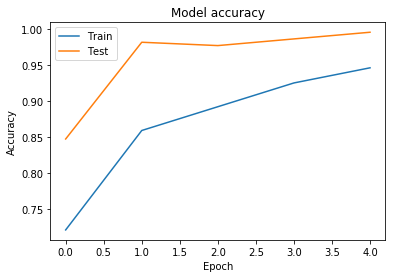

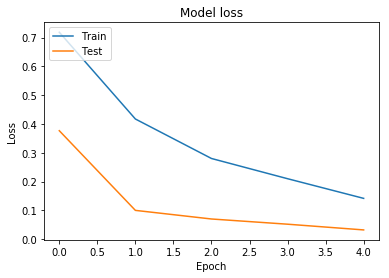

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()